**NAME: MOHANA PRIYA K**

**REGISTER NO.: 212224060158**

**EXP NO.: 05**

**EXP NAME: PSK and QPSK**

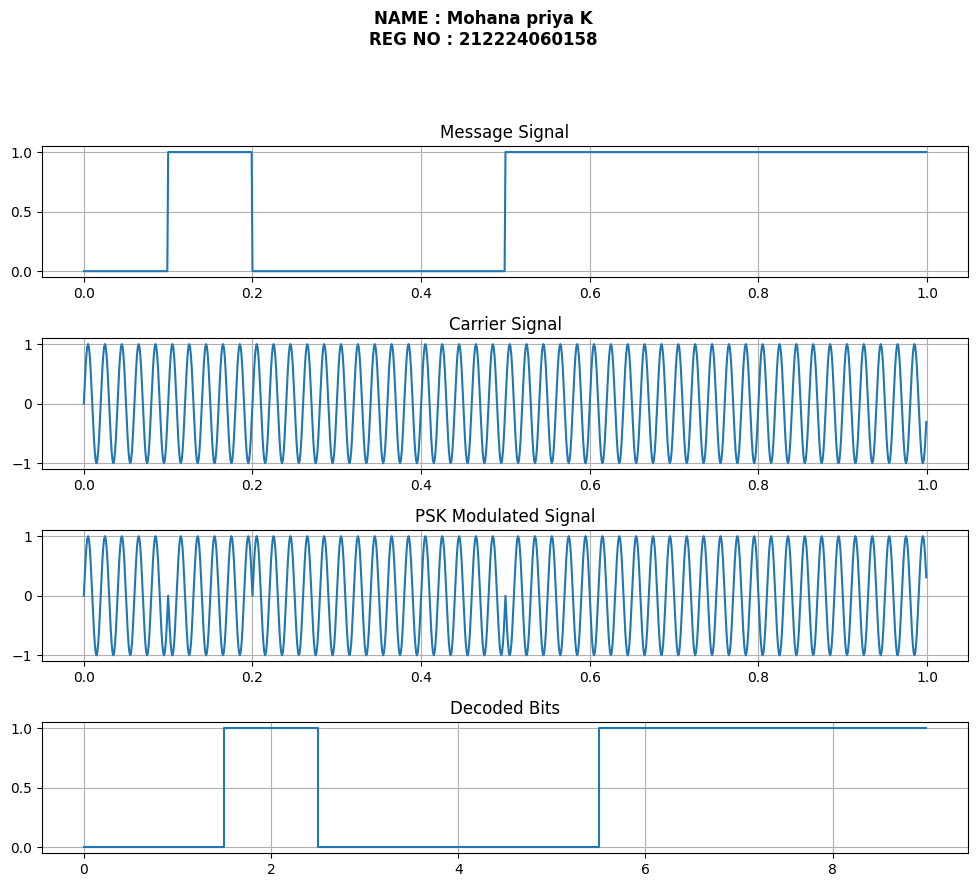

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter

# Low-pass filter
def lpf(x, fc, fs):
    b, a = butter(4, fc/(0.5*fs), 'low')
    return lfilter(b, a, x)

# Parameters
fs, fc, br, T = 1000, 50, 10, 1
t = np.arange(0, T, 1/fs)
bd = fs // br

# Message signal
bits = np.random.randint(0, 2, br)
msg = np.repeat(bits, bd)

# Carrier
carrier = np.sin(2*np.pi*fc*t)

# BPSK Modulation (0 → 0°, 1 → 180°)
bpsk = np.sin(2*np.pi*fc*t + np.pi*msg)

# Demodulation
demod = lpf(bpsk * carrier, fc, fs)
decoded = (demod[::bd] < 0).astype(int)

# Plot
plt.figure(figsize=(10,9))
plt.suptitle("NAME : Mohana priya K\nREG NO : 212224060158",
             fontsize=12, fontweight='bold')

plt.subplot(4,1,1)
plt.plot(t, msg)
plt.title("Message Signal")
plt.grid(True)

plt.subplot(4,1,2)
plt.plot(t, carrier)
plt.title("Carrier Signal")
plt.grid(True)

plt.subplot(4,1,3)
plt.plot(t, bpsk)
plt.title("PSK Modulated Signal")
plt.grid(True)

plt.subplot(4,1,4)
plt.step(range(len(decoded)), decoded, where='mid')
plt.title("Decoded Bits")
plt.grid(True)

plt.tight_layout(rect=[0,0,1,0.93])
plt.show()

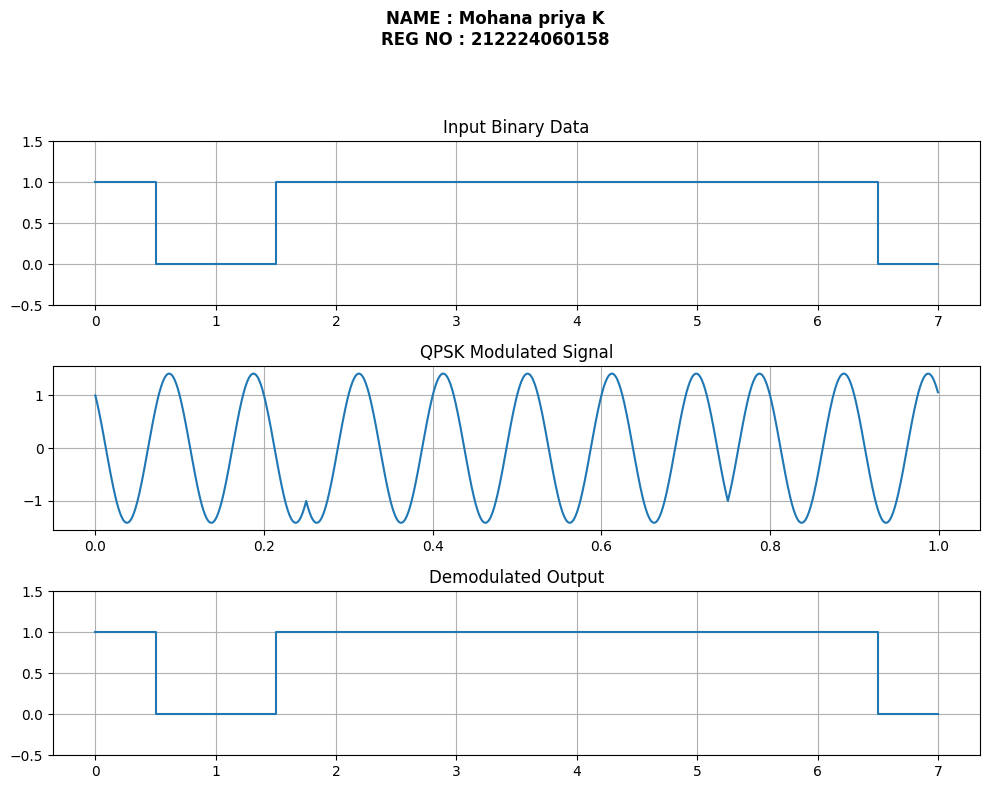

In [5]:
import matplotlib.pyplot as plt

# Parameters
fs = 1000          # Sampling frequency
fc = 10            # Carrier frequency
T = 1              # Total duration
t = np.arange(0, T, 1/fs)

# Input bit pairs
bits = np.array([1,0, 1,1, 1,1, 1,0])   # 10 11 11 10
symbols = bits.reshape(-1, 2)

symbol_samples = len(t) // len(symbols)

# QPSK Modulation (I-Q method)
qpsk = np.zeros(len(t))

for i, pair in enumerate(symbols):
    I = 1 if pair[0] == 1 else -1
    Q = 1 if pair[1] == 1 else -1

    ts = t[i*symbol_samples:(i+1)*symbol_samples]
    qpsk[i*symbol_samples:(i+1)*symbol_samples] = \
        I*np.cos(2*np.pi*fc*ts) + Q*np.sin(2*np.pi*fc*ts)

# Demodulation
decoded = []
for i in range(len(symbols)):
    ts = t[i*symbol_samples:(i+1)*symbol_samples]
    segment = qpsk[i*symbol_samples:(i+1)*symbol_samples]

    I_demod = np.sum(segment * np.cos(2*np.pi*fc*ts))
    Q_demod = np.sum(segment * np.sin(2*np.pi*fc*ts))

    decoded.append(1 if I_demod > 0 else 0)
    decoded.append(1 if Q_demod > 0 else 0)

# Plot
plt.figure(figsize=(10,8))
plt.suptitle("NAME : Mohana priya K\nREG NO : 212224060158",
             fontsize=12, fontweight='bold')

plt.subplot(3,1,1)
plt.step(range(len(bits)), bits, where='mid')
plt.title("Input Binary Data")
plt.ylim(-0.5,1.5)
plt.grid(True)

plt.subplot(3,1,2)
plt.plot(t, qpsk)
plt.title("QPSK Modulated Signal")
plt.grid(True)

plt.subplot(3,1,3)
plt.step(range(len(decoded)), decoded, where='mid')
plt.title("Demodulated Output")
plt.ylim(-0.5,1.5)
plt.grid(True)

plt.tight_layout(rect=[0,0,1,0.93])
plt.show()